Project: Convolutional Neural Networks: Recognizing Street View Housing Number Digits

In [1]:
#importing required libraries
import numpy as np                                             #for linear algebra
import pandas as pd                                            #for read dataset
import h5py                                                    #store huge amounts of numerical data, and easily manipulate that data from NumPy
import matplotlib.pyplot as plt                                #for visualization
%matplotlib inline                                             

In [2]:
from tensorflow.keras.layers import Conv2D, Convolution2D      #this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D               # a pooling or max pooling operation which calculates the largest or maximum value in every patch and the feature map
from tensorflow.keras.layers import Flatten                    #flattens the multi-dimensional input tensors into a single dimension,
from tensorflow.keras.layers import Dense                      #dense layer is most often used for vector manipulation to change the dimensions of the vectors
from tensorflow.keras.models import Sequential                 #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow.keras.optimizers import Adam, SGD              #Adam optimizer is consistent across training and validation sets. SGD(Stochastic Gradient Descent), although slower, will converge in the end
from sklearn.preprocessing import MinMaxScaler                 #all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1
import warnings                                                #for not showing error message
warnings.filterwarnings("ignore")

In [3]:
file_name = 'SVHN_single_grey1.h5'
df = h5py.File(file_name,'r+')                                 #read the file
data = np.array(df)

In [4]:
ls=list(df.keys())
print("List of datasets in this file:",ls)

List of datasets in this file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [5]:
                                                                #convert all image from .h5 to numpy array
x_train = np.array(df['X_test'])
x_test = np.array(df['X_train'])
x_val = np.array(df['X_val'])

y_train = np.array(df['y_test'])
y_test = np.array(df['y_train'])
y_val = np.array(df['y_val'])

In [6]:
print(type(x_train))                                           #showing the data type
print(type(x_test))
print(type(x_val))
print(type(y_train))
print(type(y_test))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
print("Shape of x_train:",x_train.shape)                      #showing the shape of data
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)


Shape of x_train: (18000, 32, 32)
Shape of x_test: (42000, 32, 32)
Shape of x_val: (60000, 32, 32)
Shape of y_train: (18000,)
Shape of y_test: (42000,)
Shape of y_val: (60000,)


In [8]:
x_train[0]                                                      #showing first index value of train data

array([[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414, 109.1048],
       ...,
       [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074, 112.7346],
       [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 , 114.3431],
       [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017, 114.1906]],
      dtype=float32)

In [9]:
x_train[0].max()                                                 #maximum value of train_x[0]

115.7497

In [10]:
x_train = x_train/255.                                           #normalizing the train,test and val data so that all the values are in range 0 to 1.
x_test = x_test/255.
x_val = x_val/255.

In [11]:
x_train[0]                                                       #showing the first index value in train of x after normalization                                  

array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43966785, 0.44309962,
        0.43986115],
       [0.15465844, 0.17369059, 0.18500705, ..., 0.43534195, 0.43508825,
        0.4311247 ],
       [0.1507796 , 0.1711349 , 0.19101882, ..., 0.4309494 , 0.43114275,
        0.42786196],
       ...,
       [0.13720353, 0.13910078, 0.15555921, ..., 0.42827842, 0.4310094 ,
        0.44209644],
       [0.13984391, 0.13939686, 0.15811491, ..., 0.43529335, 0.43940786,
        0.4484043 ],
       [0.1419102 , 0.13890745, 0.15960705, ..., 0.43143883, 0.4360851 ,
        0.44780627]], dtype=float32)

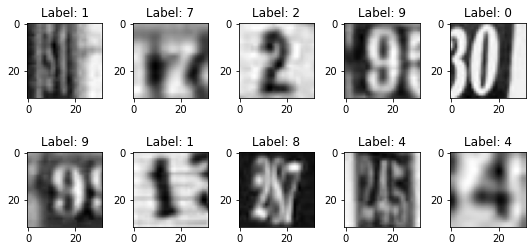

In [12]:
num_row = 2                                                      #creatinng a visualization with 2 rows and 5 colomns in a gray image
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i],cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()                                                                    

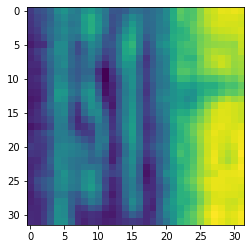

In [13]:
plt.imshow(x_train[0])                                             #visualization for train x index 0
plt.show()                                                         #for avoiding unexpected line like(<matplotlib.image.AxesImage at 0x13905706790>) 

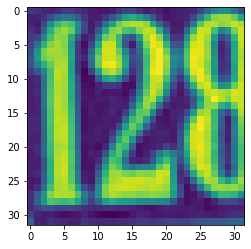

In [14]:
plt.imshow(x_test[0])                                             #visualization for test x[0]
plt.show()

In [15]:
y_test[0]                                                        #see the label of 1

2

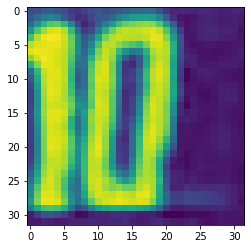

In [16]:
plt.imshow(x_val[0])                                            #visualization for val x[0]   
plt.show()

In [17]:
y_val[0]                                                        #label of val y

0

In [18]:
                                                              # CNN Model creation
cnn=Sequential()
#First layer or Input layer
cnn.add(Conv2D(6,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
cnn.add(MaxPooling2D((2,2)))

#Second layer
cnn.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))

#Third layer
cnn.add(Flatten())
cnn.add(Dense(120,activation='relu'))
cnn.add(Dense(84,activation='relu'))

#Output layer or last layer
cnn.add(Dense(42000,activation='softmax'))


In [19]:
cnn.summary()                                                    #show the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [20]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])    #compile the cnn model

In [21]:
train_cnn=cnn.fit(x_train, y_train,                                                        #train the cnn model
                  batch_size=16,
                  epochs=10,
                  verbose=1,
                  validation_data=(x_val,y_val)
                 )

Epoch 1/10
1125/1125 [==============================] - 51s 45ms/step - loss: 2.4874 - accuracy: 0.0987 - val_loss: 2.3272 - val_accuracy: 0.1000
Epoch 2/10
1125/1125 [==============================] - 50s 44ms/step - loss: 2.3122 - accuracy: 0.1065 - val_loss: 2.2579 - val_accuracy: 0.1563
Epoch 3/10
1125/1125 [==============================] - 50s 45ms/step - loss: 1.5379 - accuracy: 0.4562 - val_loss: 1.0316 - val_accuracy: 0.6708
Epoch 4/10
1125/1125 [==============================] - 50s 44ms/step - loss: 0.7890 - accuracy: 0.7656 - val_loss: 0.6908 - val_accuracy: 0.8006
Epoch 5/10
1125/1125 [==============================] - 51s 45ms/step - loss: 0.6205 - accuracy: 0.8192 - val_loss: 0.5765 - val_accuracy: 0.8335
Epoch 6/10
1125/1125 [==============================] - 55s 49ms/step - loss: 0.5383 - accuracy: 0.8390 - val_loss: 0.5480 - val_accuracy: 0.8414
Epoch 7/10
1125/1125 [==============================] - 51s 45ms/step - loss: 0.4847 - accuracy: 0.8547 - val_loss: 0.4978 -

In [22]:
score=cnn.evaluate(x_test,y_test,verbose=0)                          #showing test loss and accuracy 
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.49359872937202454
Test Accuracy: 0.8578095436096191


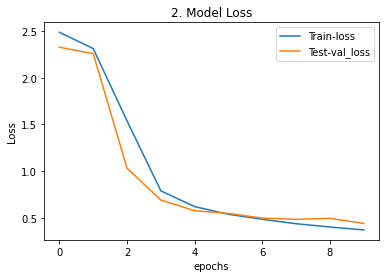

In [23]:
                                                                     #Create visualization for model loss
train=[]
test=[]

for i in train_cnn.history['loss']:
  train.append(i)

for j in train_cnn.history['val_loss']:
  test.append(j)


plt.plot(train)
plt.plot(test)
plt.title('2. Model Loss')
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.legend(['Train-loss','Test-val_loss'],loc='upper right')
plt.show()

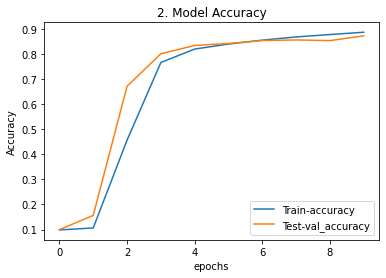

In [24]:
                                                                #Crate visualization for model accuracy
train=[]
test=[]

for i in train_cnn.history['accuracy']:
  train.append(i)

for j in train_cnn.history['val_accuracy']:
  test.append(j)

plt.plot(train)
plt.plot(test)
plt.title("2. Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epochs')
plt.legend(["Train-accuracy","Test-val_accuracy"],loc='lower right')
plt.show()